In [52]:
# import the necessary modules and libraries

from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [53]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.model_selection import StratifiedKFold

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np

In [15]:
# load the dataset
iris_data = load_iris()

In [16]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [20]:
# types of iris
iris_data['target_names']

# features of iris
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
array = iris_data.values()

In [25]:
# train test
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], random_state = 0)

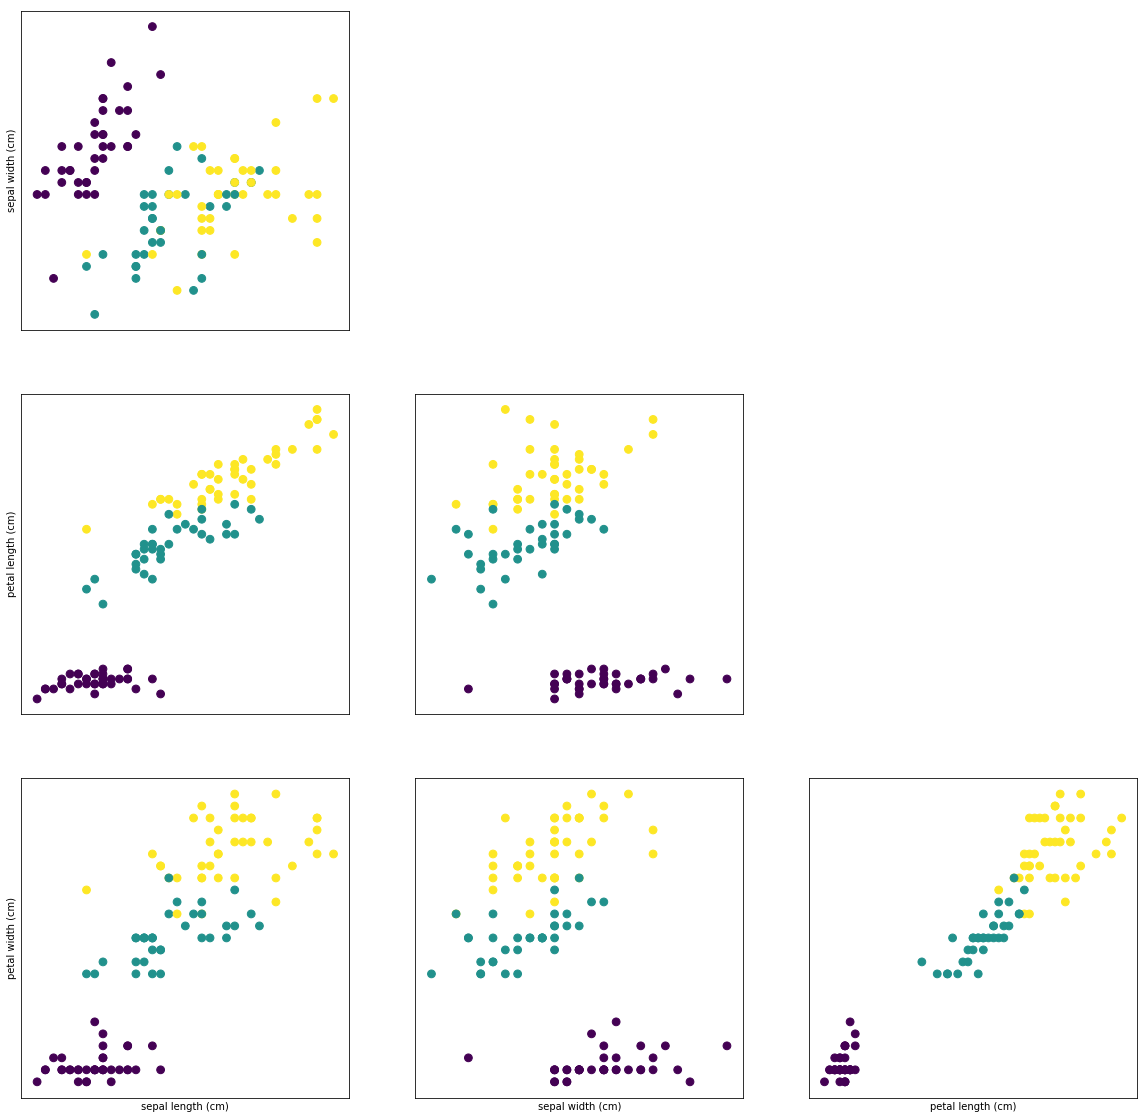

In [28]:
fig, ax = pyplot.subplots(3, 3, figsize = (20,20))
for i in range (3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j], X_train[:, i + 1], c = y_train, s = 60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        
        if i == 2:
            ax[i,j].set_xlabel(iris_data['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris_data['feature_names'][i + 1])
        if j > i:
            ax[i,j].set_visible(False)
            

In [29]:
# make a model
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [33]:

results = []
names = []
for name, model in models:
    # k fold cross validation - estimate the skill of the model on the new data
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.944242 (0.074130)
LDA: 0.981667 (0.036856)
KNN: 0.953333 (0.090615)
CART: 0.953974 (0.064559)
NB: 0.938974 (0.055084)
SVM: 0.970000 (0.064031)


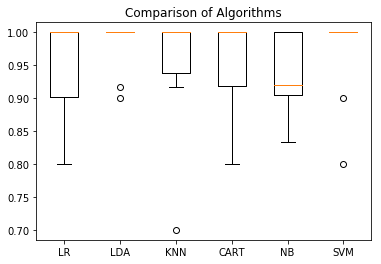

In [42]:
pyplot.boxplot(results, labels = names)
pyplot.title('Comparison of Algorithms')
pyplot.show()

In [43]:
model1 = SVC(gamma='auto')

In [45]:
model1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
# make predictions
predictions = model1.predict(X_test)

In [55]:
# accuracy score, confusion matrix, classification report
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.94      0.97        16
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38

